In [1]:
import torch
import torchvision
from torch import nn
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import MNIST
from matplotlib import pyplot as plt
from tqdm import trange

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
def display_images(in_, out, n=1):
    def to_img(x):
      x = 0.5 * (x + 1)
      x = x.view(x.size(0), 28, 28)
      return x

    for N in range(n):
        if in_ is not None:
            in_pic = to_img(in_.cpu().data) #convert inputs tensors to cpu, and then get tensor values by calling data() because pyplot doesn’t support the functions on GPU. 
            plt.figure(figsize=(18, 6))
            for i in range(4):
                plt.subplot(1,4,i+1)
                plt.imshow(in_pic[i+4*N])
                plt.axis('off')
        out_pic = to_img(out.cpu().data)
        plt.figure(figsize=(18, 6))
        for i in range(4):
            plt.subplot(1,4,i+1)
            plt.imshow(out_pic[i+4*N])
            plt.axis('off')


In [4]:
batch_size = 256

img_transform = transforms.Compose(
    [
      transforms.ToTensor(),  
      transforms.Normalize((0.5),(0.5)) 
    ]
)
dataset = MNIST('./data', transform= img_transform, download= True)
dataloader = DataLoader(dataset, batch_size= batch_size, shuffle= True)

In [5]:

class Autoencoder(nn.Module):

  def __init-__(self) -> None:
      super().__init__()
      self.encoder = nn.Sequential(
          nn.Linear(28*28,500),
          nn.Tanh()
      )
      self.decoder = nn.Sequential(
          nn.Linear(500,28*28),
          nn.Tanh()
      )
  def forward(self, x):
    x = self.encoder(x)
    x = self.decoder(x)
    return x

In [26]:


# class Autoencoder(nn.Module):

#   def __init__(self) -> None:
#       super().__init__()

#       # Building an linear encoder with Linear
#         # layer followed by Relu activation function
#         # 784 ==> 9
#       self.encoder = torch.nn.Sequential(
#           torch.nn.Linear(28 * 28, 128),
#           torch.nn.ReLU(),
#           torch.nn.Linear(128, 64),
#           torch.nn.ReLU(),
#           torch.nn.Linear(64, 36),
#           torch.nn.ReLU(),
#           torch.nn.Linear(36, 18),
#           torch.nn.ReLU(),
#           torch.nn.Linear(18, 9)
#       )
         
#         # Building an linear decoder with Linear
#         # layer followed by Relu activation function
#         # The Sigmoid activation function
#         # outputs the value between 0 and 1
#         # 9 ==> 784
#       self.decoder = torch.nn.Sequential(
#           torch.nn.Linear(9, 18),
#           torch.nn.ReLU(),
#           torch.nn.Linear(18, 36),
#           torch.nn.ReLU(),
#           torch.nn.Linear(36, 64),
#           torch.nn.ReLU(),
#           torch.nn.Linear(64, 128),
#           torch.nn.ReLU(),
#           torch.nn.Linear(128, 28 * 28),
#           torch.nn.Sigmoid()
#       )

#   def forward(self, x):
#     x = self.encoder(x)
#     x = self.decoder(x)
#     return x

In [6]:

model = Autoencoder().to(device)
criterion = nn.MSELoss()
     

In [7]:
lr = 1e-3
optimizer = torch.optim.Adam(
    model.parameters(),
    lr = lr
)

In [9]:
NUM_EPOCHS = 5 #run for atleast 20 epochs

NOISE_STD = 0.6

do = nn.Dropout()

for epoch in trange(NUM_EPOCHS):

  for data in dataloader:

    img, _ = data
    img = img.to(device)
    img = img.view(img.size(0),-1)

    # For Dropout
    noise = do(torch.ones(img.shape)).to(device)
    img_bad = (img*noise).to(device)

    # Gaussian Noise
    # img_bad = img + torch.FloatTensor(img.size()).normal_(std = NOISE_STD)
    output = model(img_bad)

    loss = criterion(output, img.data)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  
     


100%|██████████| 5/5 [01:52<00:00, 22.59s/it]


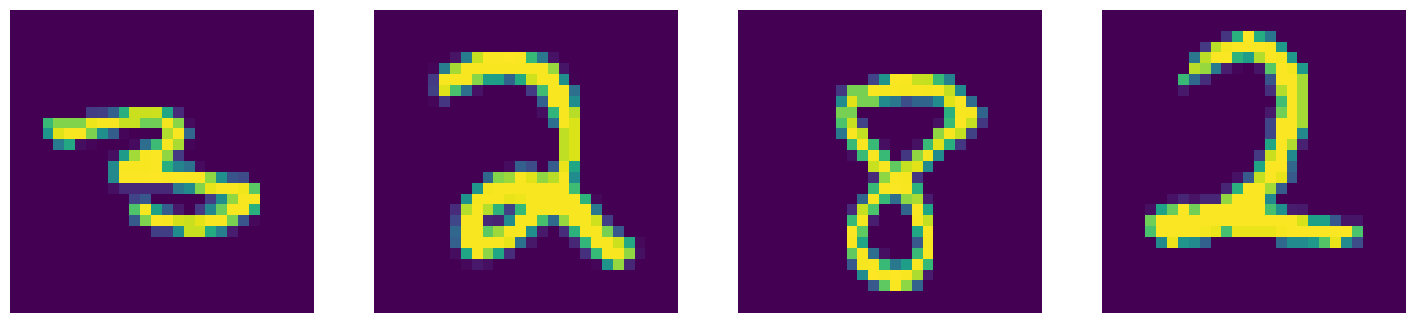

In [10]:
display_images(None, img)

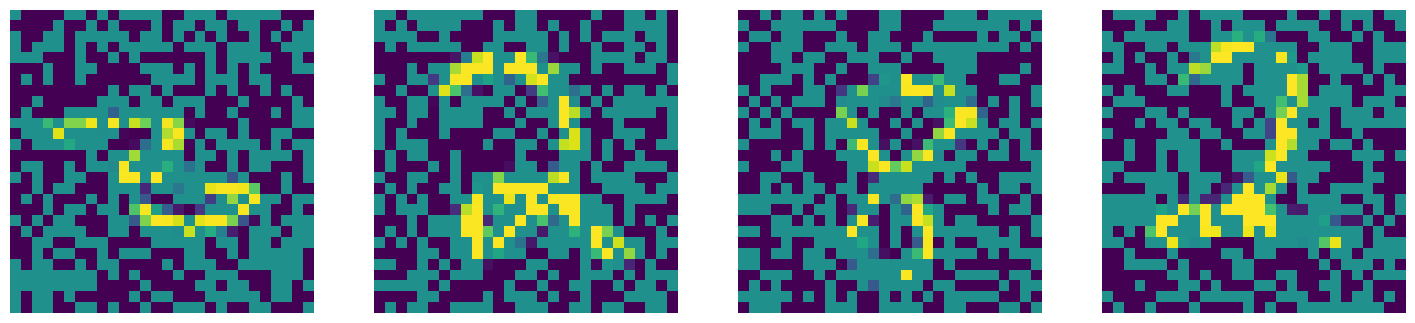

In [11]:
display_images(None, img_bad)

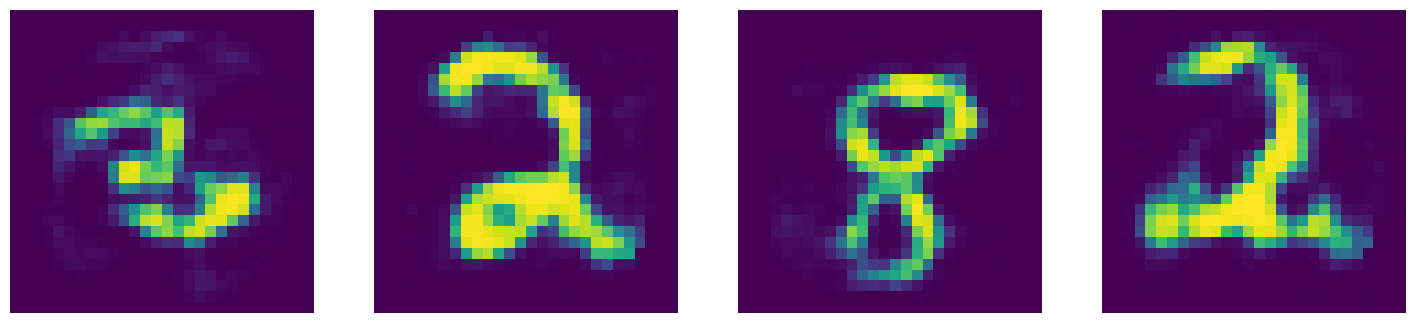

In [12]:
display_images(None, output)

# Also see T-SNE Visualization at 
https://github.com/nyumc-dl/BMSC-GA-4493-Spring2020/blob/master/lab7/lab7.ipynb